In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import data

In [2]:
# linux paths
# income and debt
wealth_file = 'data_files/2016_median_wealth_and_debt.csv'
# income over time
income_file = 'data_files/income_estimates_by_year_and_race.csv'
# pop estimates
pop_file = 'data_files/2019_population_estimates.csv'

# load dfs
wealth_df = pd.read_csv(wealth_file)
income_df = pd.read_csv(income_file)
pop_df = pd.read_csv(pop_file)

In [3]:
wealth_df.head()

,race,median_value_assets,std_error_value,median_debt,std_error_debt
0,White alone,114700,3874,66600,102000
1,"White alone, not Hispanic",143600,3988,72600,86190
2,Black alone,12920,2414,34500,16920
3,Asian alone,210100,20070,107000,6727
4,Other (residual),20140,5951,42000,3970


In [4]:
income_df.head()

,race,year,median_income,std_median_income,mean_income,std_mean_income
0,all_races,2018,63179,420,90021.0,546
1,all_races,2017,62626,330,89779.0,584
2,all_races,2016,61779,456,87001.0,491
3,all_races,2015,59901,340,84011.0,427
4,all_races,2014,56969,416,80413.0,474


In [5]:
    pop_df

,race,pop_perc
0,"White alone, percent",0.765
1,"Black or African American alone, percent",0.134
2,"American Indian and Alaska Native alone, percent",0.013
3,"Asian alone, percent",0.059
4,Native Hawaiian and Other Pacific Islander alo...,0.002
5,"Two or More Races, percent",0.027
6,"Hispanic or Latino, percent",0.183
7,"White alone, not Hispanic or Latino, percent",0.604


# Data transformations

In [6]:
white_income = wealth_df.median_value_assets.iloc[1]

In [7]:
# calculate % income based on white alone, not hispanic

wealth_df['median_perc_income_of_white'] = wealth_df.median_value_assets / white_income

In [8]:
wealth_df

,race,median_value_assets,std_error_value,median_debt,std_error_debt,median_perc_income_of_white
0,White alone,114700,3874,66600,102000,0.798747
1,"White alone, not Hispanic",143600,3988,72600,86190,1.000000
2,Black alone,12920,2414,34500,16920,0.089972
3,Asian alone,210100,20070,107000,6727,1.463092
4,Other (residual),20140,5951,42000,3970,0.140251
5,Hispanic origin (any race),21420,3182,36000,17560,0.149164
6,Not of Hispanic origin,111800,2820,65000,112100,0.778552


# EDA Graphs

In [9]:
income_df.mean_income[income_df.race == 'all_races']

0     90021.0
1     89779.0
2     87001.0
3     84011.0
4     80413.0
5     81189.0
6     78095.0
7     77962.0
8     77783.0
9     79751.0
10    79997.0
11    82081.0
12    83111.0
13    81647.0
14    80578.0
15    80840.0
16    80975.0
17    82758.0
18    83545.0
19    82754.0
20    80067.0
21    77766.0
22    75340.0
23    73760.0
24    72503.0
25    71091.0
26    68330.0
27    68374.0
28    69892.0
29    71607.0
30    69615.0
31    68723.0
32    67465.0
33    64868.0
34    63397.0
35    61075.0
36    60946.0
37    60580.0
38    61283.0
39    63264.0
40    62802.0
41    60939.0
42    60045.0
43    58636.0
44    60301.0
45    61584.0
46    60751.0
47    57566.0
48    57877.0
49    57954.0
50    55565.0
51    52662.0
Name: mean_income, dtype: float64

In [10]:
income_df.year[income_df.race == 'all_races']

0     2018
1     2017
2     2016
3     2015
4     2014
5     2013
6     2012
7     2011
8     2010
9     2009
10    2008
11    2007
12    2006
13    2005
14    2004
15    2003
16    2002
17    2001
18    2000
19    1999
20    1998
21    1997
22    1996
23    1995
24    1994
25    1993
26    1992
27    1991
28    1990
29    1989
30    1988
31    1987
32    1986
33    1985
34    1984
35    1983
36    1982
37    1981
38    1980
39    1979
40    1978
41    1977
42    1976
43    1975
44    1974
45    1973
46    1972
47    1971
48    1970
49    1969
50    1968
51    1967
Name: year, dtype: int64

In [11]:
list(income_df.race.unique())

['all_races',
 'white_alone',
 'white_alone_not_hispanic',
 'black_alone_or_in_combo',
 'black_alone',
 'asian_alone_or_in_combo',
 'asian_alone',
 'asian_and_pacific_islander',
 'hispanic']

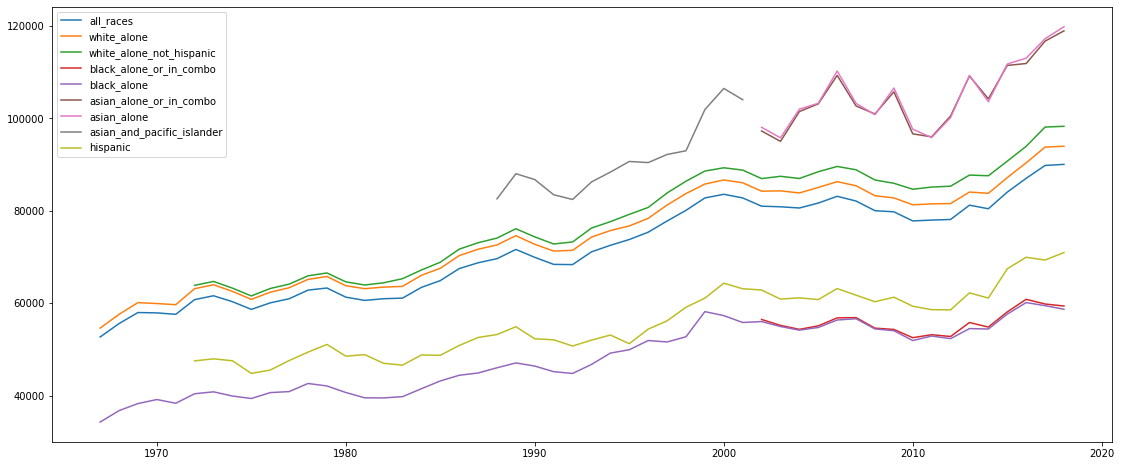

In [12]:
# income over time lines

races = list(income_df.race.unique())

plt.figure(figsize=(19,8))

for race in races:
    x_years = income_df.year[income_df.race == race]
    mean_incomes = income_df.mean_income[income_df.race == race]
    plt.plot(x_years, mean_incomes, label=race)

plt.legend()
plt.show()
#plt.savefig("income_over_time.png")

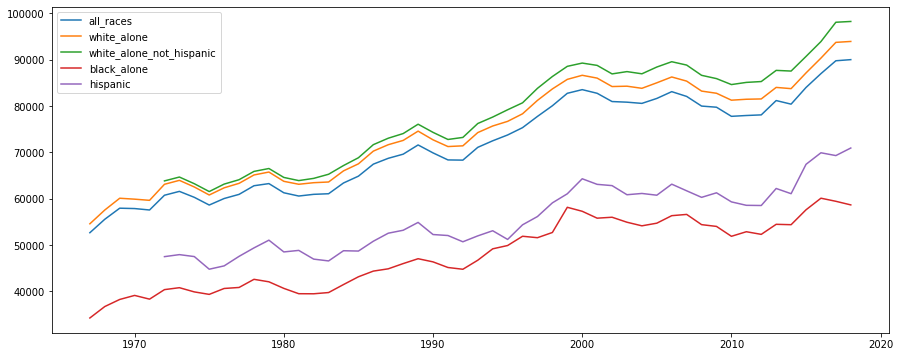

In [13]:
# Income over time
# only include white alone, not hispanic, black, and hispanic

filtered_races = ['all_races', 'white_alone', 'white_alone_not_hispanic', \
                    'black_alone', 'hispanic']
                    
plt.figure(figsize=(15,6))

for race in filtered_races:
    x_years = income_df.year[income_df.race == race]
    mean_incomes = income_df.mean_income[income_df.race == race]
    plt.plot(x_years, mean_incomes, label=race)

plt.legend()
plt.show()

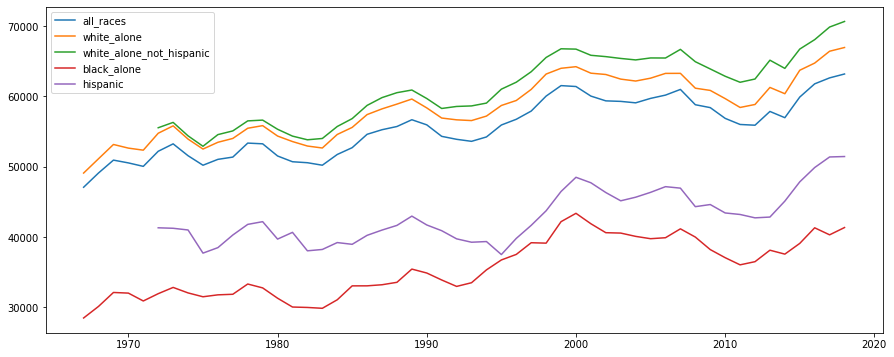

In [14]:
plt.figure(figsize=(15,6))

for race in filtered_races:
    x_years = income_df.year[income_df.race == race]
    median_incomes = income_df.median_income[income_df.race == race]
    plt.plot(x_years, median_incomes, label=race)

plt.legend()
plt.show()

In [15]:
# calculate diff between all races and black
black_income_df = income_df[income_df.race == 'black_alone'].copy()
all_income_df = income_df[income_df.race == 'all_races'].copy()
#calc_df = income_df.copy()

In [16]:
black_diff = all_income_df.median_income - black_income_df.median_income


In [17]:
black_income_df.median_income.head()

168    41361
169    40324
170    41323
171    39108
172    37583
Name: median_income, dtype: int64

In [18]:
all_income_df.median_income.head()

0    63179
1    62626
2    61779
3    59901
4    56969
Name: median_income, dtype: int64

In [19]:
all_income_df.median_income.iloc[0] - black_income_df.median_income.iloc[0]

21818

In [20]:
black_income_diffs = list()
try:
    len(all_income_df) == len(black_income_df)
    print("Same number of inputs")
    for i in range(len(all_income_df)):
        black_income_diffs.append(black_income_df.median_income.iloc[i] - all_income_df.median_income.iloc[i])
except:
    print("Check dataframe sizes")

Same number of inputs


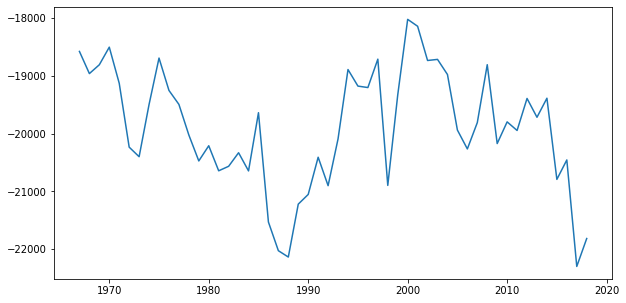

In [21]:
# Graph of diff between all races and black incomes over time

x_years = all_income_df.year

plt.figure(figsize=(10,5))

plt.plot(x_years, black_income_diffs)
plt.show()

In [22]:
# diff of whites vs all races
white_income_diffs = list()

white_income_df = income_df[income_df.race == 'white_alone']
try:
    len(all_income_df) == len(white_income_df)
    print("Same number of inputs")
    for i in range(len(all_income_df)):
        diff = white_income_df.median_income.iloc[i] - all_income_df.median_income.iloc[i]
        white_income_diffs.append(diff)
except:
    print("Check dataframe sizes")

Same number of inputs


In [41]:
income_df.race.unique()

array(['all_races', 'white_alone', 'white_alone_not_hispanic',
       'black_alone_or_in_combo', 'black_alone',
       'asian_alone_or_in_combo', 'asian_alone',
       'asian_and_pacific_islander', 'hispanic'], dtype=object)

In [52]:
# diff of hispanic vs all races

hispanic_income_diffs = list()

hispanic_income_df = income_df[income_df.race == 'hispanic']
# generate df to calc all races after 1972
all_after_72_df = income_df[(income_df.race == 'all_races') & (income_df.year >= 1972)]

try:
    len(all_after_72_df) == len(hispanic_income_df)
    print("Same number of inputs")
    for i in range(len(all_income_df)):
        diff = hispanic_income_df.median_income.iloc[i] - all_after_72_df.median_income.iloc[i]
        hispanic_income_diffs.append(diff)
except:
    print("Check dataframe sizes")

    1995
293    1994
294    1993
295    1992
296    1991
297    1990
298    1989
299    1988
300    1987
301    1986
302    1985
303    1984
304    1983
305    1982
306    1981
307    1980
308    1979
309    1978
310    1977
311    1976
312    1975
313    1974
314    1973
315    1972
Name: year, dtype: int64
-13410
269    2018
270    2017
271    2016
272    2015
273    2014
274    2013
275    2012
276    2011
277    2010
278    2009
279    2008
280    2007
281    2006
282    2005
283    2004
284    2003
285    2002
286    2001
287    2000
288    1999
289    1998
290    1997
291    1996
292    1995
293    1994
294    1993
295    1992
296    1991
297    1990
298    1989
299    1988
300    1987
301    1986
302    1985
303    1984
304    1983
305    1982
306    1981
307    1980
308    1979
309    1978
310    1977
311    1976
312    1975
313    1974
314    1973
315    1972
Name: year, dtype: int64
-14126
269    2018
270    2017
271    2016
272    2015
273    2014
274    2013
275    2012
276

In [43]:
len(hispanic_income_df)

47

In [49]:
hispanic_income_df

,race,year,median_income,std_median_income,mean_income,std_mean_income
269,hispanic,2018,51450,447,70945.0,984
270,hispanic,2017,51389,472,69312.0,941
271,hispanic,2016,49887,707,69916.0,845
272,hispanic,2015,47852,652,67423.0,887
273,hispanic,2014,45114,548,61085.0,696
274,hispanic,2013,42850,1283,62210.0,1838
275,hispanic,2012,42738,585,58535.0,765
276,hispanic,2011,43217,612,58577.0,665
277,hispanic,2010,43433,672,59318.0,762
278,hispanic,2009,44628,589,61276.0,672


In [50]:
all_after_72_df

,race,year,median_income,std_median_income,mean_income,std_mean_income
0,all_races,2018,63179,420,90021.0,546
1,all_races,2017,62626,330,89779.0,584
2,all_races,2016,61779,456,87001.0,491
3,all_races,2015,59901,340,84011.0,427
4,all_races,2014,56969,416,80413.0,474
5,all_races,2013,57856,706,81189.0,717
6,all_races,2012,55900,229,78095.0,461
7,all_races,2011,56006,281,77962.0,412
8,all_races,2010,56873,375,77783.0,416
9,all_races,2009,58400,250,79751.0,285


In [48]:
len(all_after_72_df)

47

In [44]:
hispanic_income_df

,race,year,median_income,std_median_income,mean_income,std_mean_income
269,hispanic,2018,51450,447,70945.0,984
270,hispanic,2017,51389,472,69312.0,941
271,hispanic,2016,49887,707,69916.0,845
272,hispanic,2015,47852,652,67423.0,887
273,hispanic,2014,45114,548,61085.0,696
274,hispanic,2013,42850,1283,62210.0,1838
275,hispanic,2012,42738,585,58535.0,765
276,hispanic,2011,43217,612,58577.0,665
277,hispanic,2010,43433,672,59318.0,762
278,hispanic,2009,44628,589,61276.0,672


In [54]:
len(hispanic_income_diffs)

47

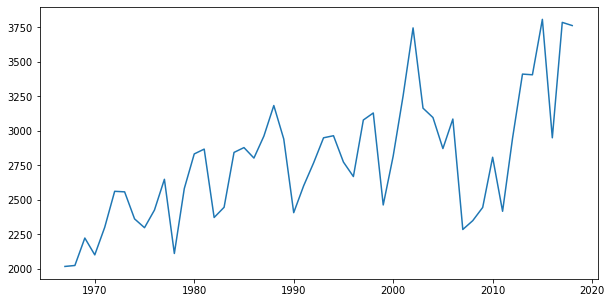

In [23]:
# Graph of diff between all races and white incomes over time

x_years = all_income_df.year

plt.figure(figsize=(10,5))

plt.plot(x_years, white_income_diffs)
plt.show()

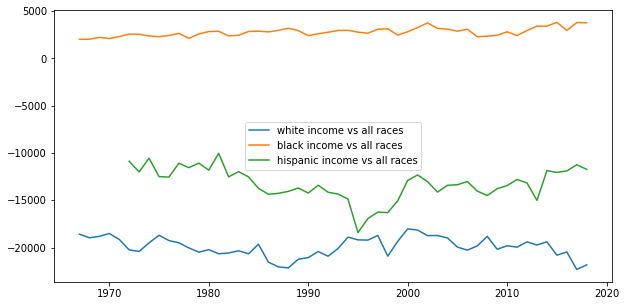

In [55]:
# Graph of income differences together

x_years = all_income_df.year

plt.figure(figsize=(10,5))

plt.plot(x_years, black_income_diffs, label='white income vs all races')
plt.plot(x_years, white_income_diffs, label = 'black income vs all races')
plt.plot(hispanic_income_df.year, hispanic_income_diffs, label='hispanic income vs all races')
plt.legend()
plt.show()

In [ ]:
# Calculate all values for after 1972, earliest recorded year of Hispanics

income_diffs_df = pd.DataFrame()

income_diffs_df['year'] = hispanic_income_df.year
income_diffs_df['year'] = b

In [62]:
len(hispanic_income_diffs)

47

In [63]:
len(black_income_diffs)

52

In [64]:
len(white_income_diffs[5:52])

47

In [68]:
income_diffs_df = pd.DataFrame()

income_diffs_df['year'] = hispanic_income_df.year # 1972 and on
income_diffs_df['black_diff'] = black_income_diffs[5:52] # after 1972
income_diffs_df['white_diff'] = white_income_diffs[5:52] # after 1972
income_diffs_df['hispanic_diff'] = hispanic_income_diffs # after 1972

In [69]:
income_diffs_df

,year,black_diff,white_diff,hispanic_diff
269,2018,-19716,3412,-11729
270,2017,-19390,2946,-11237
271,2016,-19945,2417,-11892
272,2015,-19796,2809,-12049
273,2014,-20172,2445,-11855
274,2013,-18805,2349,-15006
275,2012,-19809,2285,-13162
276,2011,-20265,3086,-12789
277,2010,-19938,2872,-13440
278,2009,-18975,3097,-13772


In [27]:
# perc of white income that black income is over time

income_diffs_df['med_white_income'] = list(income_df.median_income[income_df.race == 'white_alone'])
income_diffs_df['med_black_income'] = list(income_df.median_income[income_df.race == 'black_alone'])

In [28]:

list(income_df.median_income[income_df.race == 'white_alone'])

[66943,
 66413,
 64729,
 63710,
 60376,
 61268,
 58846,
 58423,
 59682,
 60845,
 61160,
 63270,
 63264,
 62584,
 62177,
 62451,
 63107,
 63293,
 64216,
 63989,
 63170,
 60990,
 59413,
 58705,
 57198,
 56560,
 56665,
 56920,
 58359,
 59619,
 58900,
 58222,
 57411,
 55588,
 54586,
 52662,
 52943,
 53577,
 54361,
 55839,
 55470,
 54020,
 53474,
 52512,
 53927,
 55809,
 54759,
 52354,
 52646,
 53163,
 51138,
 49102]

In [29]:
income_diffs_df['perc_of_white_inc'] = income_diffs_df.med_black_income / income_diffs_df.med_white_income

In [30]:
income_diffs_df

,year,black_diff,white_diff,med_white_income,med_black_income,perc_of_white_inc
0,2018,-21818,3764,66943,41361,0.617854
1,2017,-22302,3787,66413,40324,0.607170
2,2016,-20456,2950,64729,41323,0.638400
3,2015,-20793,3809,63710,39108,0.613844
4,2014,-19386,3407,60376,37583,0.622482
5,2013,-19716,3412,61268,38140,0.622511
6,2012,-19390,2946,58846,36510,0.620433
7,2011,-19945,2417,58423,36061,0.617240
8,2010,-19796,2809,59682,37077,0.621243
9,2009,-20172,2445,60845,38228,0.628285


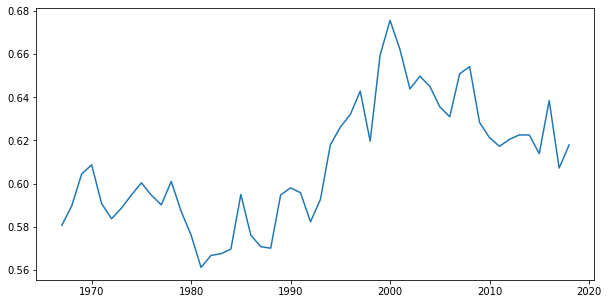

In [31]:
# perc of black income vs white income

x_years = income_diffs_df.year
perc = income_diffs_df.perc_of_white_inc

plt.figure(figsize=(10,5))
plt.plot(x_years, perc)
plt.show()

In [32]:
# illustrating part of a whole
# black and hispanic wealth and debt

wealth_df

,race,median_value_assets,std_error_value,median_debt,std_error_debt,median_perc_income_of_white
0,White alone,114700,3874,66600,102000,0.798747
1,"White alone, not Hispanic",143600,3988,72600,86190,1.000000
2,Black alone,12920,2414,34500,16920,0.089972
3,Asian alone,210100,20070,107000,6727,1.463092
4,Other (residual),20140,5951,42000,3970,0.140251
5,Hispanic origin (any race),21420,3182,36000,17560,0.149164
6,Not of Hispanic origin,111800,2820,65000,112100,0.778552


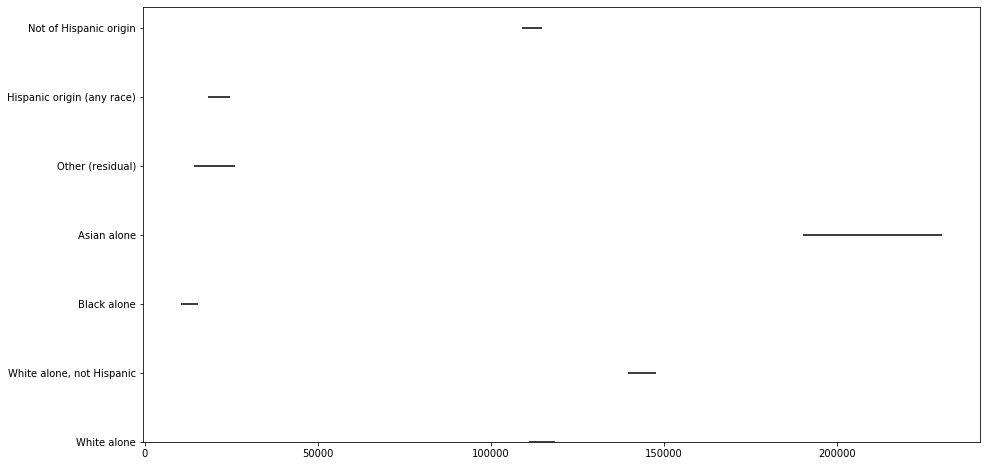

In [33]:
# Skip debt, std is way too high

y_cats = list(wealth_df.race)
x_vals = list(wealth_df.median_value_assets)
test_vals = [114700, 143600, 12920, 210100, 20140, 21420, 111800]
var = wealth_df.std_error_value

plt.figure(figsize=(15,8))

plt.bar(test_vals, y_cats, xerr=var, color='green')

plt.show()

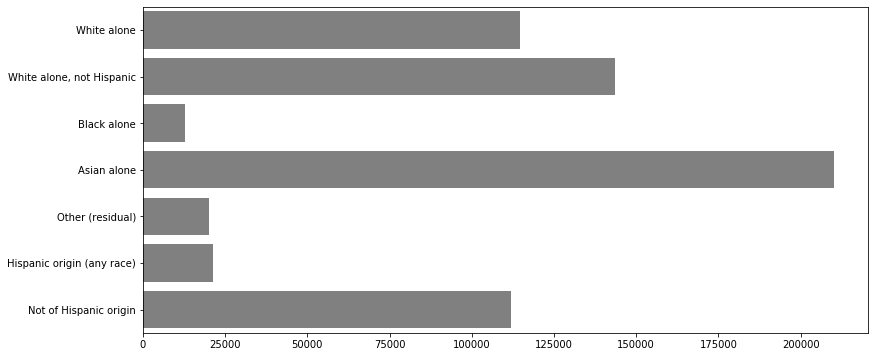

In [34]:
plt.figure(figsize=(13,6))

sns.barplot(x_vals, y_cats, orient='h', color='grey')

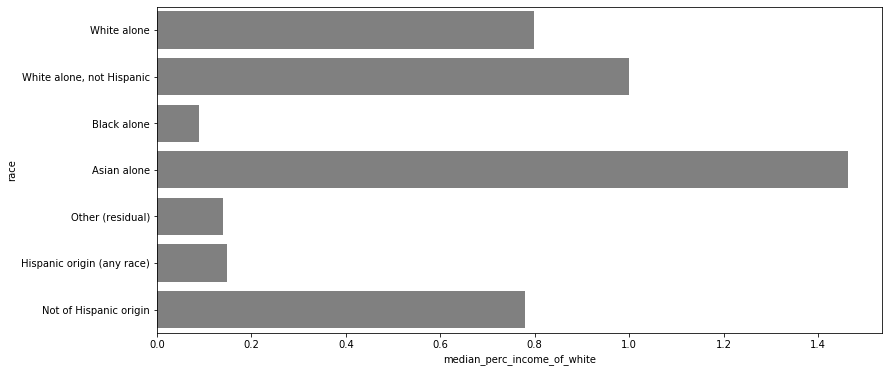

In [35]:
# Plot bar % of white alone, not hispanic income

cats = wealth_df.race
perc_of_white = wealth_df.median_perc_income_of_white

plt.figure(figsize=(13,6))

sns.barplot(perc_of_white, cats, orient='h', color='grey')

# Export data

In [75]:
income_diffs_df
income_diffs_df.to_csv('income_diffs.csv')

In [77]:
wealth_perc_df = wealth_df[['race', 'median_perc_income_of_white']]
wealth_perc_df
wealth_perc_df.to_csv('wealth_perc_of_white.csv')

In [78]:
pop_df
pop_df.to_csv('pop_perc_estimate.csv')